In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [30]:
subprocess.check_output(["make"])

b"make: Nothing to be done for `all'.\n"

600000
Starting position:  6.830029160042809 1.830105279272285 7.071167961500041
Wind speed:  1  m/s


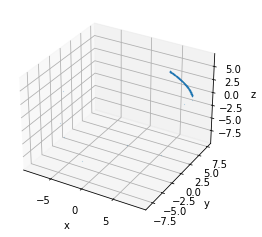

600000
Starting position:  6.829898037791046 1.8314683872873192 7.070941686914496
Wind speed:  5  m/s


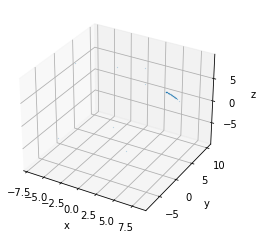

600000
Starting position:  6.829484420215951 1.8357358781081976 7.070234532167509
Wind speed:  10  m/s


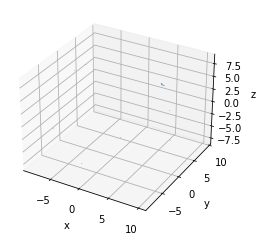

600000
Starting position:  6.827818140573169 1.852804115428852 7.067391056755659
Wind speed:  20  m/s


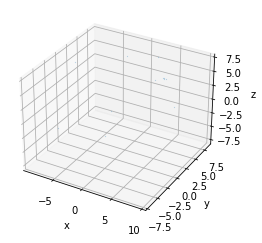

600000
Starting position:  6.824937088711172 1.8812541783010404 7.062656472727493
Wind speed:  30  m/s


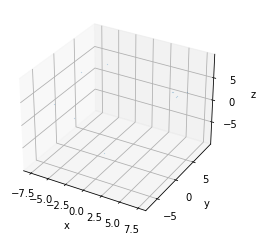

In [31]:
windspeeds=[1, 5, 10, 20, 30] #m/s
for windspeed in windspeeds:
    fig=plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    theta=[]
    phi=[]
    r=[]
    position_list=subprocess.check_output(["./main.x", "%d"%windspeed]).decode() #simulating for 10 minutes, step=0.01
    position_list=position_list.split("\n")
    for line in position_list[:-1]:
        line=line.split(' ')
        theta.append(float(line[4]))
        phi.append(float(line[5]))
        r.append(float(line[6]))
    theta=np.array(theta)
    phi=np.array(phi)
    print(len(phi))
    r=np.array(r)
    x=np.multiply(r, np.multiply(np.sin(theta), np.cos(phi)))
    y=np.multiply(r, np.multiply(np.sin(theta), np.sin(phi)))
    z=np.multiply(r, np.cos(theta))
    print("Starting position: ",x[0], y[0], z[0])
    line, =ax.plot(x, y, z, 'o', markersize=0.1)
    print("Wind speed: ", windspeed, " m/s")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()